# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | sao raimundo nonato
Processing Record 6 of Set 1 | launceston
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | sao felix do xingu
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | morant bay
Processing Record 13 of Set 1 | tasbuget
City not found. Skipping...
Processing Record 14 of Set 1 | broome
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 18 of Set 1 | yuscaran
Processing Record 19 of Set 1 | carleton place
Processing Record 20 of Set 1 | ribeira grande


Processing Record 38 of Set 4 | omboue
Processing Record 39 of Set 4 | thompson
Processing Record 40 of Set 4 | bar harbor
Processing Record 41 of Set 4 | clyde river
Processing Record 42 of Set 4 | saleaula
City not found. Skipping...
Processing Record 43 of Set 4 | nouadhibou
Processing Record 44 of Set 4 | rolim de moura
City not found. Skipping...
Processing Record 45 of Set 4 | cabedelo
Processing Record 46 of Set 4 | unai
Processing Record 47 of Set 4 | seymchan
Processing Record 48 of Set 4 | kiruna
Processing Record 49 of Set 4 | nanakuli
Processing Record 0 of Set 5 | mahebourg
Processing Record 1 of Set 5 | codrington
Processing Record 2 of Set 5 | namibe
Processing Record 3 of Set 5 | vila franca do campo
Processing Record 4 of Set 5 | mafinga
Processing Record 5 of Set 5 | tyup
Processing Record 6 of Set 5 | mgandu
Processing Record 7 of Set 5 | kahului
Processing Record 8 of Set 5 | biltine
Processing Record 9 of Set 5 | souillac
Processing Record 10 of Set 5 | robertsport

Processing Record 28 of Set 8 | porto novo
Processing Record 29 of Set 8 | toliary
City not found. Skipping...
Processing Record 30 of Set 8 | puli
Processing Record 31 of Set 8 | lysa hora
Processing Record 32 of Set 8 | dingle
Processing Record 33 of Set 8 | eluru
Processing Record 34 of Set 8 | palauig
Processing Record 35 of Set 8 | scottsburgh
City not found. Skipping...
Processing Record 36 of Set 8 | bandrele
Processing Record 37 of Set 8 | luderitz
Processing Record 38 of Set 8 | nizhniy kuranakh
Processing Record 39 of Set 8 | buraydah
Processing Record 40 of Set 8 | humboldt
Processing Record 41 of Set 8 | sao jose da coroa grande
Processing Record 42 of Set 8 | najran
Processing Record 43 of Set 8 | pacific grove
Processing Record 44 of Set 8 | okakarara
Processing Record 45 of Set 8 | qasigiannguit
Processing Record 46 of Set 8 | sur
Processing Record 47 of Set 8 | arroio grande
Processing Record 48 of Set 8 | russell
Processing Record 49 of Set 8 | sibolga
Processing Recor

Processing Record 17 of Set 12 | cairns
Processing Record 18 of Set 12 | tessalit
Processing Record 19 of Set 12 | lukiv
Processing Record 20 of Set 12 | jumla
Processing Record 21 of Set 12 | beian
Processing Record 22 of Set 12 | athabasca
Processing Record 23 of Set 12 | barra
Processing Record 24 of Set 12 | tianpeng
Processing Record 25 of Set 12 | kilindoni
Processing Record 26 of Set 12 | sortland
Processing Record 27 of Set 12 | jasper
Processing Record 28 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 29 of Set 12 | ambam
Processing Record 30 of Set 12 | barbar
City not found. Skipping...
Processing Record 31 of Set 12 | san quintin
Processing Record 32 of Set 12 | tanete
Processing Record 33 of Set 12 | kalabo
Processing Record 34 of Set 12 | daigo
Processing Record 35 of Set 12 | emerald
Processing Record 36 of Set 12 | smithers
Processing Record 37 of Set 12 | dawson creek
Processing Record 38 of Set 12 | san vicente
Processing Record 39 of Set 12 | 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,25.98,75,12,7.06,PF,1675623139
1,new norfolk,-42.7826,147.0587,14.72,64,100,2.24,AU,1675623140
2,ushuaia,-54.8000,-68.3000,8.81,57,40,13.38,AR,1675623143
3,sao raimundo nonato,-9.0153,-42.6994,35.90,23,100,4.00,BR,1675623146
4,launceston,-41.4500,147.1667,11.75,87,77,0.89,AU,1675623150


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,25.98,75,12,7.06,PF,1675623139
1,new norfolk,-42.7826,147.0587,14.72,64,100,2.24,AU,1675623140
2,ushuaia,-54.8000,-68.3000,8.81,57,40,13.38,AR,1675623143
3,sao raimundo nonato,-9.0153,-42.6994,35.90,23,100,4.00,BR,1675623146
4,launceston,-41.4500,147.1667,11.75,87,77,0.89,AU,1675623150


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

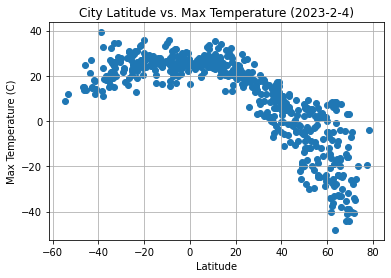

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Max Temperature (2023-2-4)")
plt.grid(visible=True, which='major', axis='both')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

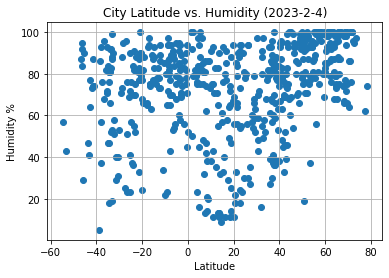

In [14]:
# Build the scatter plots for latitude vs. humidity
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity (2023-2-4)")
plt.grid(visible=True, which='major', axis='both')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

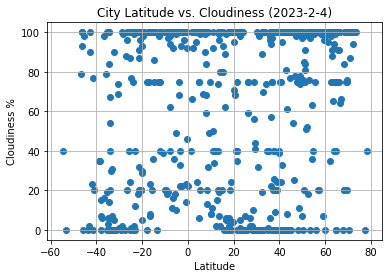

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness (2023-2-4)")
plt.grid(visible=True, which='major', axis='both')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

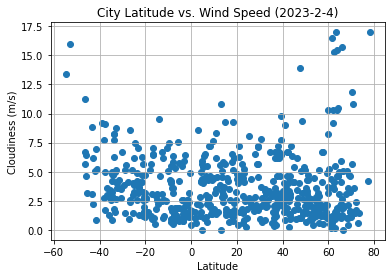

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-2-4)")
plt.grid(visible=True, which='major', axis='both')


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
regress = stats.linregress

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,bethel,41.3712,-73.4140,8.02,45,0,3.60,US,1675623151
9,yellowknife,62.4560,-114.3525,-25.71,76,100,4.12,CA,1675623145
10,morant bay,17.8815,-76.4093,32.06,64,6,6.51,JM,1675623152
11,broome,42.2506,-75.8330,6.72,52,100,4.02,US,1675622891
14,yuscaran,13.9333,-86.8500,25.58,32,2,5.83,HN,1675623153


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,25.98,75,12,7.06,PF,1675623139
1,new norfolk,-42.7826,147.0587,14.72,64,100,2.24,AU,1675623140
2,ushuaia,-54.8000,-68.3000,8.81,57,40,13.38,AR,1675623143
3,sao raimundo nonato,-9.0153,-42.6994,35.90,23,100,4.00,BR,1675623146
4,launceston,-41.4500,147.1667,11.75,87,77,0.89,AU,1675623150


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7359200019508289


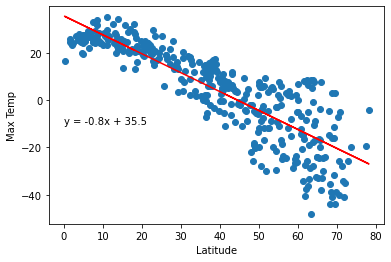

In [20]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = regress(x_value, y_value)
regress_value = x_value * slope + intercept
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(x_value, y_value)
plt.plot(x_value,regress_value,"r-")

plt.xlabel('Latitude')
plt.ylabel("Max Temp")
plt.text(0, -10, equation)
print(f'The r-value is: {rvalue**2}')

plt.show()

The r-value is: 0.18852203354834673


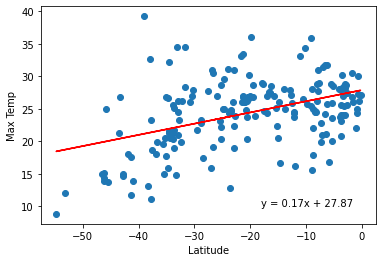

In [21]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = regress(x_value, y_value)
regress_value = x_value * slope + intercept
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_value, "r-")

plt.xlabel('Latitude')
plt.ylabel("Max Temp")
plt.text(-18, 10, equation)
print(f'The r-value is: {rvalue**2}')

plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there appears to be a strong correlation between an increase in latitude and a decrease in max temperature. In the southern hemisphere, there appears to be a somewhat weak correlation between the increase latitude and a increase in max temperature.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20209401922029216


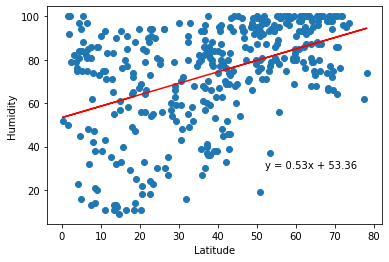

In [22]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = regress(x_value, y_value)
regress_value = x_value * slope + intercept
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(x_value, y_value)
plt.plot(x_value,regress_value,"r-")

plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.text(52, 30, equation)
print(f'The r-value is: {rvalue**2}')

plt.show()

The r-value is: 0.04275673199871674


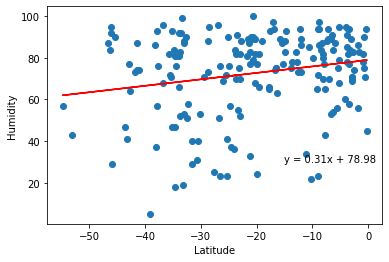

In [23]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = regress(x_value, y_value)
regress_value = x_value * slope + intercept
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_value, "r-")

plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.text(-15, 30, equation)
print(f'The r-value is: {rvalue**2}')

plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there appears to be a somewhat weak correlation between an increase in latitude and a increase in humidity. In the southern hemisphere, there appears to be an extremely weak correlation between the increase latitude and a increase in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03778106003496373


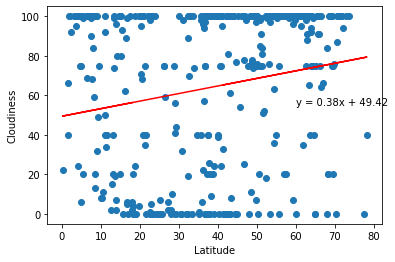

In [24]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = regress(x_value, y_value)
regress_value = x_value * slope + intercept
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(x_value, y_value)
plt.plot(x_value,regress_value,"r-")

plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.text(60, 55, equation)
print(f'The r-value is: {rvalue**2}')

plt.show()

The r-value is: 0.12297628730078017


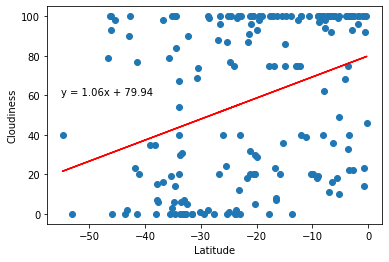

In [26]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = regress(x_value, y_value)
regress_value = x_value * slope + intercept
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_value, "r-")

plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.text(-55, 60, equation)
print(f'The r-value is: {rvalue**2}')

plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there appears to be a very weak correlation between an increase in latitude and a increase in cloudiness. In the southern hemisphere, there appears to be an fairly weak correlation between the increase latitude and a increase in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0022114830744665442


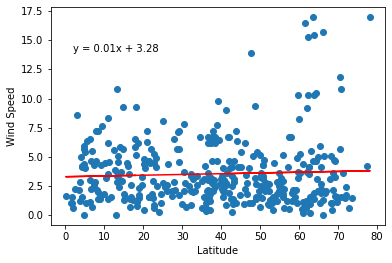

In [27]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = regress(x_value, y_value)
regress_value = x_value * slope + intercept
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(x_value, y_value)
plt.plot(x_value,regress_value,"r-")

plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.text(2, 14, equation)
print(f'The r-value is: {rvalue**2}')

plt.show()

The r-value is: 0.19683578210474664


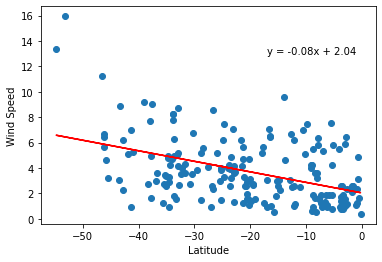

In [28]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = regress(x_value, y_value)
regress_value = x_value * slope + intercept
equation = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_value, "r-")

plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.text(-17, 13, equation)
print(f'The r-value is: {rvalue**2}')

plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there appears to be a extremely weak correlation between an increase in latitude and a increase in wind spped. In the southern hemisphere, there appears to be an  weak correlation between the increase latitude and a increase in cloudiness.